In [ ]:
# http://theshybulb.com/2017/09/27/xor-neural-network.html

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

In [8]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1)) # bias is 0
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1)) # bias is 0
    
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters 

In [9]:
def forward_propagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

In [10]:
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

In [11]:
def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    return parameters

In [12]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]]) # XOR
n_h = 2 # number of perceptron in hidden layer
n_x = X.shape[0] # number of inputs
n_y = Y.shape[0] # number of outputs
parameters = initialize_parameters(n_x, n_h, n_y) # (2,2,1)

num_iterations = 100000
learning_rate = 1
losses = np.zeros((num_iterations, 1))

for i in range(num_iterations):
    losses[i, 0], cache, A2 = forward_propagation(X, Y, parameters)
    grads = backward_propagation(X, Y, cache)
    parameters = update_parameters(parameters, grads, learning_rate)

In [14]:
print(parameters)

{'W1': array([[-8.60333651, -8.59014645],
       [-7.21002459, -7.20789411]]), 'b1': array([[ 3.81457657],
       [10.92385383]]), 'W2': array([[-19.90385773,  19.91654979]]), 'b2': array([[-9.86880707]])}


[[8.05043625e-05 9.99917958e-01 9.99918054e-01 9.31071373e-05]]
[[0. 1. 1. 0.]]


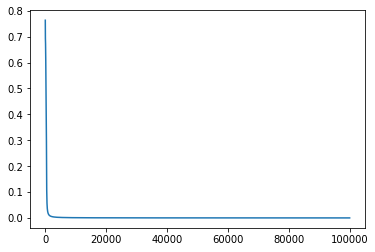

In [13]:
cost, _, A2 = forward_propagation(X, Y, parameters)
pred = (A2 > 0.5) * 1.0
print(A2)
print(pred)
plt.figure()
plt.plot(losses)
plt.show()